# Fitting 2D multivariate Gaussian distributions of particles

In [1]:
from reduced_model import *

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
from scipy import stats

import matplotlib
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import pandas as pd
import math

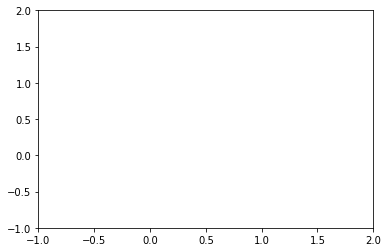

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 2), ylim=(-1, 2))
particles_d, = ax.plot([], [], 'bo', ms=4)
particles_c, = ax.plot([], [], 'ro', ms=2)
#parents, = ax.plot([], [], 'ro', ms=4)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    particles_c.set_data([], [])
    particles_d.set_data([], [])
    #parents.set_data([], [])
    time_text.set_text('')
    return particles_c,particles_d,time_text

# animation function.  This is called sequentially
def animate(i):
    global locs,loc_c,loc_d
    x_c = [z[0] for z in loc_c[i]]
    y_c = [z[1] for z in loc_c[i]]
    particles_c.set_data(x_c,y_c)
    x_d = [z[0] for z in loc_d[i]]
    y_d = [z[1] for z in loc_d[i]]
    particles_d.set_data(x_d,y_d)
    time_text.set_text('Time = %.1f' % i)
    return particles_c,particles_d, time_text

## Uniformly dispersed

### Radius 0.5

In [4]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 4, alpha = 8, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:05:33


In [6]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 4, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:51


In [5]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 20, alpha = 20, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:54


In [6]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:52


### Radius 0.1

In [7]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 4, alpha = 8, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:51


In [8]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 4, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:51


In [9]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 20, alpha = 20, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:48


In [10]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:46


In [12]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 2, alpha = 1/2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:47


In [23]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 120, beta=0.2, gamma = 2, alpha = 1/2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:50


In [24]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 120, beta=0.2, gamma = 2, alpha = 1/2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:48


## Defectors placed at the periphery of the group

In [11]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699, n_mut = 200, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:46


In [13]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 200, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.05, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:47


In [14]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 20, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.05, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:00:53


In [15]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 50, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.05, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:08


In [16]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 100, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.05, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:36


In [17]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 100, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:36


In [18]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 100, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:36


In [20]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 150, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.5, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:08


In [21]:
sim = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 150, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:02:07


### For density estimation

In [20]:
loc_c_all = dict()
loc_d_all = dict()

In [21]:
sim1 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim1.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[1], loc_d_all[1] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:52


In [22]:
sim2 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.69, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim2.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[2], loc_d_all[2] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:51


In [23]:
sim3 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.67, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim3.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[3], loc_d_all[3] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:51


In [24]:
sim4 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.65, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim4.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[4], loc_d_all[4] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:51


In [25]:
sim5 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.60, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim5.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[5], loc_d_all[5] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:51


In [26]:
sim6 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.50, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim6.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[6], loc_d_all[6] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:51


In [27]:
sim7 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.40, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim7.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[7], loc_d_all[7] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:01:50


In [38]:
sim8 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.7, n_mut = 120, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim8.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[8], loc_d_all[8] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

ValueError: all the input arrays must have same number of dimensions

In [29]:
sim9 = Sim_mutant_resident(n_iter = 50, n_res = 200, p_coop = 0.7, q = 0.699999, n_mut = 1, beta=0.2, gamma = 1/2, alpha = 2, normalise = False, clustering = False, n_clusters = None, payoff_func = 'quorum', power_func = 4, group = True, radius = 0.1, outer_ring = True)
loc_c, loc_d = sim9.loop_pos(selection = False, steps = 20, v_max = 0.05, eta = 0.01, limit_interactions = True, interaction_radius = float('inf'))

loc_c_all[9], loc_d_all[9] = loc_c, loc_d

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)
rc('animation', html='html5')
anim

Progress: [##################################################] 100.0%
Duration: 0:00:43


## Density plot of defectors

In [7]:
X = np.concatenate([loc_d[z] for z in loc_d], 1)

In [8]:
# Extract x and y
x = X[:,0::2]
x = np.reshape(x,np.size(x))
y = X[:,1::2]
y = np.reshape(y,np.size(y))
values = np.vstack([x, y])
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
"""
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
"""
xmin, xmax, ymin, ymax = -0.1,0.1,-0.1,0.1
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-0.1 0.1 -0.1 0.1


In [34]:
#Gaussian KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

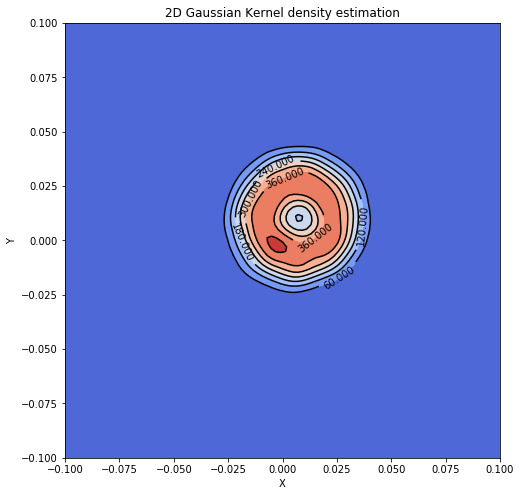

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

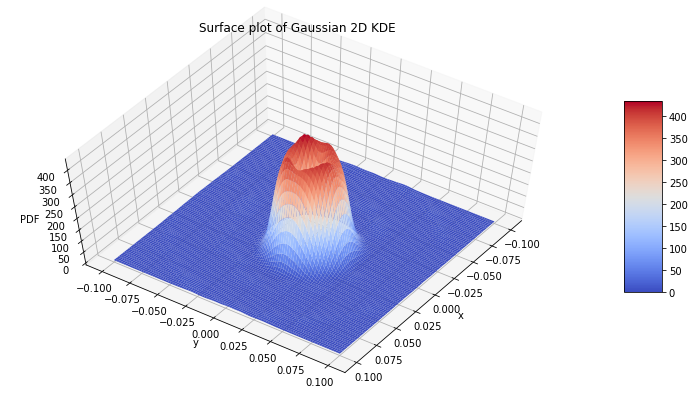

In [36]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

/home/pgrad2/2265960b/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


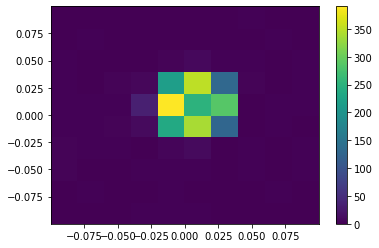

In [37]:
h =plt.hist2d(x, y, normed=True)
plt.colorbar(h[3])

In [55]:
def transform_dict_array(d):
    e = d[0]
    for i in range(1,len(d)):
        e = np.concatenate((e,d[i]))
    return e
        
def transform_cord_radius(a):
    return np.power((np.power(a[:,0],2)+np.power(a[:,1],2)),1/2)

In [85]:
values = transform_dict_array(loc_d)
va_d = transform_cord_radius(values)
df_d = pd.DataFrame(values, columns=["x", "y"])

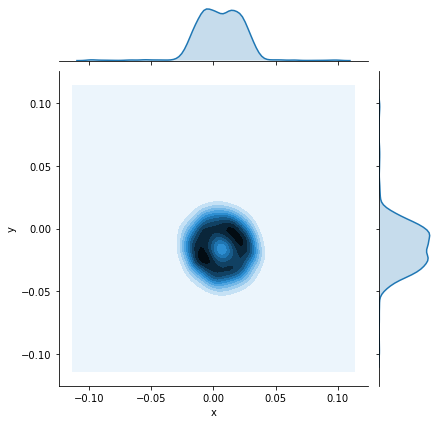

In [86]:
sns.jointplot(x="x", y="y", data=df_d, kind="kde")

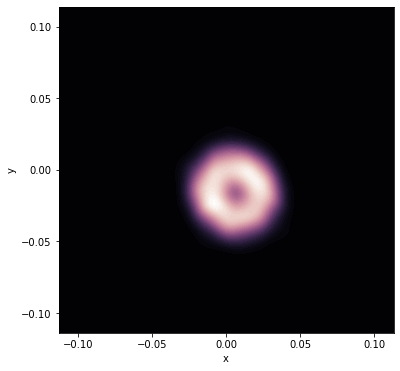

In [88]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_d.x, df_d.y, cmap=cmap, n_levels=60, shade=True)

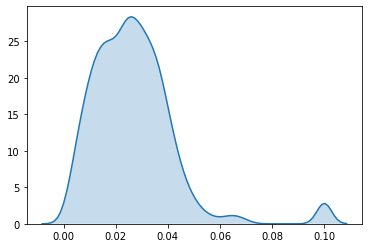

In [89]:
sns.kdeplot(va_d, shade=True)

## Density plot of cooperators

In [38]:
X = np.concatenate([loc_c[z] for z in loc_c], 1)

In [39]:
# Extract x and y
x = X[:,0::2]
x = np.reshape(x,np.size(x))
y = X[:,1::2]
y = np.reshape(y,np.size(y))
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
"""
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
"""
xmin, xmax, ymin, ymax = -0.1,0.1,-0.1,0.1
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-0.1 0.1 -0.1 0.1


In [34]:
#Gaussian KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

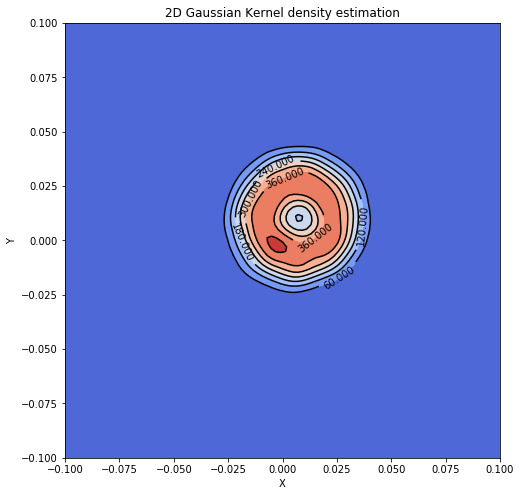

In [40]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

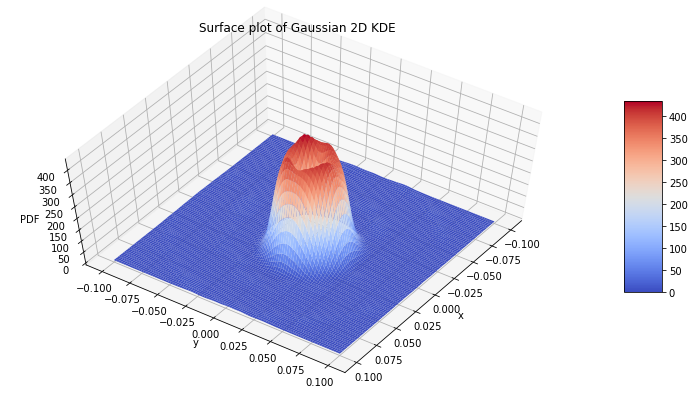

In [41]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

/home/pgrad2/2265960b/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


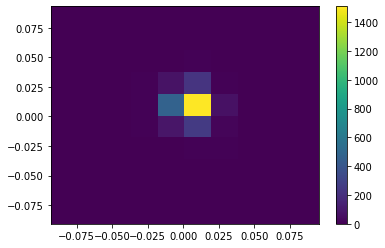

In [42]:
h =plt.hist2d(x, y, normed=True)
plt.colorbar(h[3])

In [101]:
values_c = transform_dict_array(loc_c)
va_c = transform_cord_radius(values_c)
df_c = pd.DataFrame(values_c, columns=["x", "y"])

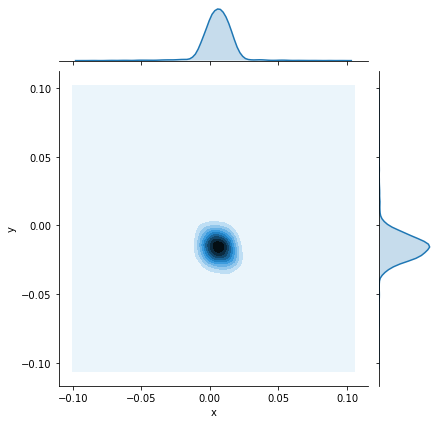

In [102]:
sns.jointplot(x="x", y="y", data=df_c, kind="kde")

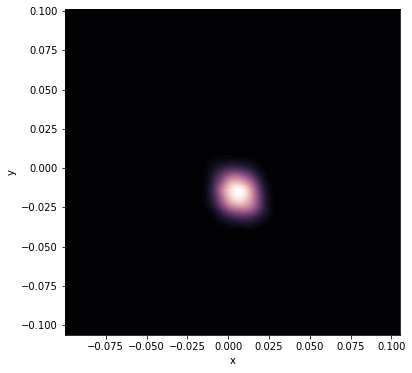

In [103]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_c.x, df_c.y, cmap=cmap, n_levels=60, shade=True)

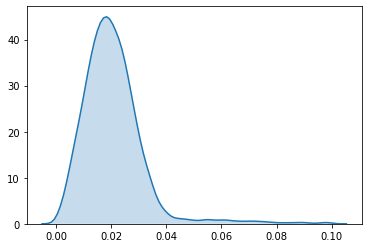

In [104]:
sns.kdeplot(va_c, shade=True)

### Residents and mutants

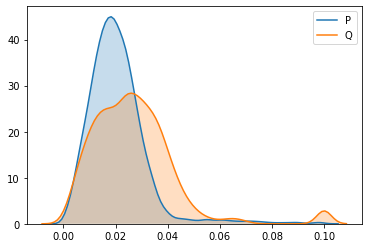

In [111]:
sns.kdeplot(va_c, shade=True, label = 'P')
sns.kdeplot(va_d, shade=True, label = 'Q')
plt.legend()

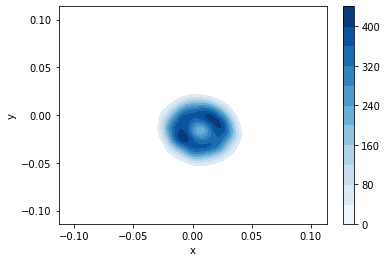

In [106]:
sns.kdeplot(df_d.x, df_d.y,
                  cmap="Blues", shade=True, shade_lowest=False, cbar = True)

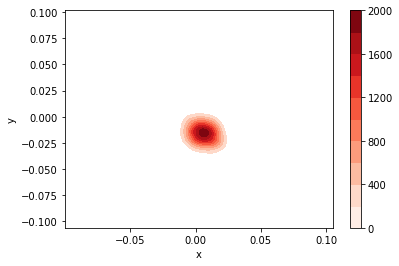

In [109]:
sns.kdeplot(df_c.x, df_c.y,
                  cmap="Reds", shade=True, shade_lowest=False, cbar = True)

## Multiple strategies

In [30]:
def transform_dict_array(d):
    e = d[0]
    for i in range(1,len(d)):
        e = np.concatenate((e,d[i]))
    return e
        
def transform_cord_radius(a):
    return np.power((np.power(a[:,0],2)+np.power(a[:,1],2)),1/2)

In [31]:
values_c = dict()
va_c = dict()
df_c = dict()
for i in range(1,10):
    values_c[i] = transform_dict_array(loc_c_all[i])
    va_c[i] = transform_cord_radius(values_c[i])
    df_c[i] = pd.DataFrame(values_c[i], columns=["x", "y"])

In [32]:
values_d = dict()
va_d = dict()
df_d = dict()
for i in range(1,10):
    values_d[i] = transform_dict_array(loc_d_all[i])
    va_d[i] = transform_cord_radius(values_d[i])
    df_d[i] = pd.DataFrame(values_d[i], columns=["x", "y"])

Density plots of multiple scenarios (p=0.7, 200 residents in all of them):
1. q = 0.69999, 120 mutants
2. q = 0.69, 120 mutants
3. q = 0.67, 120 mutants
4. q = 0.65, 120 mutants
5. q = 0.6, 120 mutants (not displayed)
6. q = 0.5, 120 mutants (not displayed)
7. q = 0.4, 120 mutants (not displayed)
8. q = 0.7, 120 mutants (or rather 320
9. q = 0.6999, 1 mutant

The mean of distribution P1 is 0.026871
The mean of distribution P2 is 0.030510
The mean of distribution P3 is 0.034800
The mean of distribution P4 is 0.032206
The mean of distribution P8 is nan
The mean of distribution P9 is 0.016619


/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


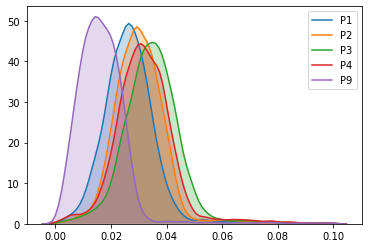

In [40]:
for i in range(1,10):
    if i not in [5,6,7]:
        sns.kdeplot(va_c[i], shade=True, label = 'P'+str(i))
        print ('The mean of distribution P%d is %f' %(i,np.mean(va_c[i])))
plt.legend()

The mean of distribution P1 is 0.031296
The mean of distribution P2 is 0.033846
The mean of distribution P3 is 0.037385
The mean of distribution P4 is 0.034799
The mean of distribution P8 is 0.018111
The mean of distribution P9 is 0.019163


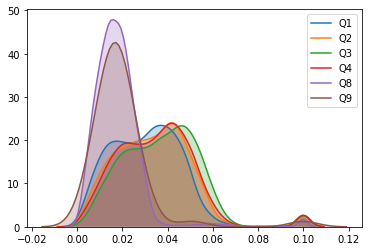

In [41]:
for i in range(1,10):
    if i not in [5,6,7]:
        sns.kdeplot(va_d[i], shade=True, label = 'Q'+str(i))
        print ('The mean of distribution P%d is %f' %(i,np.mean(va_d[i])))
plt.legend()